In [1]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.8/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 3.1/150.0 MB 5.8 MB/s eta 0:00:26
   - -------------------------------------- 4.5/150.0 MB 5.8 MB/s eta 0:00:25
   - -------------------------------------- 5.8/150.0 MB 5.9 MB/s eta 0:00:25
   - -------------------------------------- 7.3/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 8.7/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 9.4/150.0 MB 5.7 MB/s eta 0:00:25
   -- ------------------------------------- 11.0/150.0 MB 5.8 MB/s eta 0:00:24
   --- ------------------------------------ 11.5/150.0 MB 5.6 MB/s eta 0:00:25
   --- ------------------------------------ 12.6/150.0 MB 5.4 MB/s eta 0:00:2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('diabetes.csv')
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop('class',axis = 1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 42)

In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_test_scaled)
print("--------------------------------------------")
print(X_train_scaled)

[[ 0.59862596 -0.76861084 -0.77711838 ...  0.25118909 -0.17352778
   0.85907489]
 [-0.59472612 -0.33202521  0.29121402 ...  0.50247478 -1.00422008
  -1.07126295]
 [-0.59472612 -0.45676396 -0.40005989 ... -0.22181929 -0.97476291
  -1.07126295]
 ...
 [ 0.89696398 -0.26965583 -0.40005989 ... -0.72439068  0.71607886
   0.06939123]
 [-1.19140216 -0.11373239 -0.27437372 ...  0.96070164 -0.67724545
  -0.98352032]
 [-0.2963881  -0.20728646 -4.42201718 ... -1.30086963 -0.8893371
  -0.89577769]]
--------------------------------------------
[[ 1.79197804 -1.48585867  0.7311156  ...  0.1477185  -0.66546258
   0.42036175]
 [ 0.89696398  0.44759199  1.23386027 ... -0.04444115 -0.28841076
   0.50810437]
 [-0.2963881   1.10247045 -0.40005989 ... -0.16269324 -0.57119963
  -0.80803506]
 ...
 [ 1.79197804 -0.67505678  0.98248793 ...  1.96584443  1.90614868
   0.42036175]
 [-1.19140216  0.57233075 -4.42201718 ...  1.49283606 -0.83631419
  -0.36932192]
 [-1.19140216  0.07337574  1.61091876 ... -1.44868475 

In [13]:
xgb = XGBClassifier(use_label_encoder = False,  eval_metric = 'logloss', random_state = 42)

param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [2,3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8,1.0]
}
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid_search=GridSearchCV(estimator=xgb,
                         param_grid=param_grid,
                         scoring='recall',
                         cv=skf,
                         verbose=1,
                         n_jobs=-1)

In [15]:
grid_search.fit(X_train_scaled,y_train)
best_model=grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Cross-Validated Recall:",grid_search.best_score_)
y_pred=best_model.predict(X_test_scaled)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-Validated Recall: 0.6257575757575757


C:\Users\hi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Confusion Matrix:
 [[328  77]
 [ 79 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       405
           1       0.63      0.62      0.63       210

    accuracy                           0.75       615
   macro avg       0.72      0.72      0.72       615
weighted avg       0.75      0.75      0.75       615



#### Identify feature importance scores using XGBClassifier

In [21]:
best_model.feature_importances_

array([0.06926996, 0.21269408, 0.06446119, 0.08271457, 0.13993882,
       0.16163525, 0.09235562, 0.1769305 ], dtype=float32)

In [24]:
features=pd.DataFrame(best_model.feature_importances_,index=df.iloc[:,:-1].columns,columns=["Importances"])
df1=features.sort_values(by="Importances")

<Axes: xlabel='None', ylabel='Importances'>

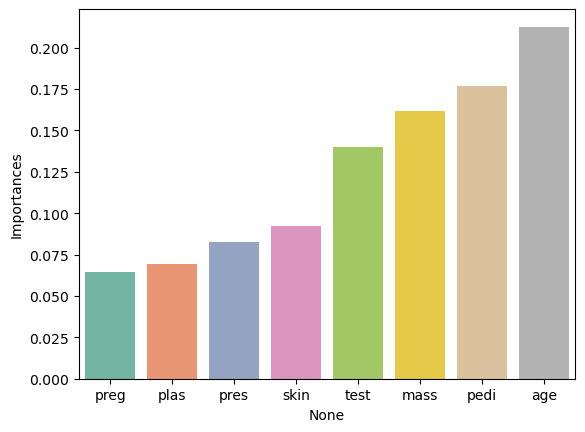

In [26]:
import seaborn as sns
sns.barplot(data=df1,x=features.index,y="Importances",hue=features.index,palette="Set2")